<a href="https://colab.research.google.com/github/DuillesAD/Challenge-Telecon-X-analise-de-dados/blob/main/Challenge_Telecon_X_analise_de_dados.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [104]:
# Bibliotecas que podem ser usadas
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import plotly.express as px
import requests

In [105]:
url = 'https://raw.githubusercontent.com/alura-cursos/challenge2-data-science/refs/heads/main/TelecomX_Data.json'
response = requests.get(url)
data_json = response.json()

# Transformando em DataFrame para visualizar sua estrutura
df = pd.DataFrame(data_json)
df


,customerID,Churn,customer,phone,internet,account
0,0002-ORFBO,No,"{'gender': 'Female', 'SeniorCitizen': 0, 'Part...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'One year', 'PaperlessBilling': '..."
1,0003-MKNFE,No,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'Yes'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
2,0004-TLHLJ,Yes,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
3,0011-IGKFF,Yes,"{'gender': 'Male', 'SeniorCitizen': 1, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
4,0013-EXCHZ,Yes,"{'gender': 'Female', 'SeniorCitizen': 1, 'Part...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
...,...,...,...,...,...,...
7262,9987-LUTYD,No,"{'gender': 'Female', 'SeniorCitizen': 0, 'Part...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'One year', 'PaperlessBilling': '..."
7263,9992-RRAMN,Yes,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'Yes'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
7264,9992-UJOEL,No,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
7265,9993-LHIEB,No,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'Two year', 'PaperlessBilling': '..."


In [106]:
# Normalizando os dados do arquivo .json
df = pd.json_normalize(df.to_dict(orient='records'), sep='_')
df.head()

,customerID,Churn,customer_gender,customer_SeniorCitizen,customer_Partner,customer_Dependents,customer_tenure,phone_PhoneService,phone_MultipleLines,internet_InternetService,...,internet_OnlineBackup,internet_DeviceProtection,internet_TechSupport,internet_StreamingTV,internet_StreamingMovies,account_Contract,account_PaperlessBilling,account_PaymentMethod,account_Charges_Monthly,account_Charges_Total
0,0002-ORFBO,No,Female,0,Yes,Yes,9,Yes,No,DSL,...,Yes,No,Yes,Yes,No,One year,Yes,Mailed check,65.6,593.3
1,0003-MKNFE,No,Male,0,No,No,9,Yes,Yes,DSL,...,No,No,No,No,Yes,Month-to-month,No,Mailed check,59.9,542.4
2,0004-TLHLJ,Yes,Male,0,No,No,4,Yes,No,Fiber optic,...,No,Yes,No,No,No,Month-to-month,Yes,Electronic check,73.9,280.85
3,0011-IGKFF,Yes,Male,1,Yes,No,13,Yes,No,Fiber optic,...,Yes,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,98.0,1237.85
4,0013-EXCHZ,Yes,Female,1,Yes,No,3,Yes,No,Fiber optic,...,No,No,Yes,Yes,No,Month-to-month,Yes,Mailed check,83.9,267.4


In [107]:
# Visualização dos tipos de dados
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 21 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   customerID                 7267 non-null   object 
 1   Churn                      7267 non-null   object 
 2   customer_gender            7267 non-null   object 
 3   customer_SeniorCitizen     7267 non-null   int64  
 4   customer_Partner           7267 non-null   object 
 5   customer_Dependents        7267 non-null   object 
 6   customer_tenure            7267 non-null   int64  
 7   phone_PhoneService         7267 non-null   object 
 8   phone_MultipleLines        7267 non-null   object 
 9   internet_InternetService   7267 non-null   object 
 10  internet_OnlineSecurity    7267 non-null   object 
 11  internet_OnlineBackup      7267 non-null   object 
 12  internet_DeviceProtection  7267 non-null   object 
 13  internet_TechSupport       7267 non-null   objec

In [108]:
df.isnull().sum()

,0
customerID,0
Churn,0
customer_gender,0
customer_SeniorCitizen,0
customer_Partner,0
customer_Dependents,0
customer_tenure,0
phone_PhoneService,0
phone_MultipleLines,0
internet_InternetService,0


In [109]:
df.duplicated().sum()

np.int64(0)

In [110]:
# Contar valores nulos ou em branco por coluna
valores_nulos_ou_vazios = df.apply(lambda x: x.isnull() | (x.astype(str).str.strip() == '')).sum()

# Exibir colunas com pelo menos 1 valor inválido
print("\nValores nulos, em branco ou strings vazias por coluna:")
print(valores_nulos_ou_vazios[valores_nulos_ou_vazios > 0])



Valores nulos, em branco ou strings vazias por coluna:
Churn                    224
account_Charges_Total     11
dtype: int64


In [111]:
# Remover linhas duplicadas
df = df.drop_duplicates()

In [112]:
# Eliminando as colunas de Churn

df = df[df['Churn'].str.strip() != '']
print("Número de linhas vazias 'Churn':", len(df))

Número de linhas vazias 'Churn': 7043


In [113]:
# identificar e substituir strings vazias por NaN
df.replace(r"^\s*$", np.nan, regex=True, inplace=True)

# Remover a linha se todas colunas estiverem com vazias
df.dropna(how="all", inplace=True)

In [114]:
# Padronizar textos (remover espaços e colocar em minúsculo) em colunas de texto
coluna_texto = df.select_dtypes(include=['object', 'category']).columns
for col in coluna_texto:
    df[col] = df[col].astype(str).str.strip().str.lower()

In [115]:
# Verificar novamente os nulos após limpeza de strings
print("Valores nulos após limpeza:")
print(df.isnull().sum()[df.isnull().sum() > 0])

Valores nulos após limpeza:
Series([], dtype: int64)


In [116]:
df.head()

,customerID,Churn,customer_gender,customer_SeniorCitizen,customer_Partner,customer_Dependents,customer_tenure,phone_PhoneService,phone_MultipleLines,internet_InternetService,...,internet_OnlineBackup,internet_DeviceProtection,internet_TechSupport,internet_StreamingTV,internet_StreamingMovies,account_Contract,account_PaperlessBilling,account_PaymentMethod,account_Charges_Monthly,account_Charges_Total
0,0002-orfbo,no,female,0,yes,yes,9,yes,no,dsl,...,yes,no,yes,yes,no,one year,yes,mailed check,65.6,593.3
1,0003-mknfe,no,male,0,no,no,9,yes,yes,dsl,...,no,no,no,no,yes,month-to-month,no,mailed check,59.9,542.4
2,0004-tlhlj,yes,male,0,no,no,4,yes,no,fiber optic,...,no,yes,no,no,no,month-to-month,yes,electronic check,73.9,280.85
3,0011-igkff,yes,male,1,yes,no,13,yes,no,fiber optic,...,yes,yes,no,yes,yes,month-to-month,yes,electronic check,98.0,1237.85
4,0013-exchz,yes,female,1,yes,no,3,yes,no,fiber optic,...,no,no,yes,yes,no,month-to-month,yes,mailed check,83.9,267.4


In [117]:
colunas_nomes = {
    "customerID": "ID cliente",
    "Churn": "evasao",
    "customer_gender": "gênero",
    "customer_SeniorCitizen": "65 >=",
    "customer_Partner": "p parceiro",
    "customer_Dependents": "dependentes",
    "customer_tenure": "t contrato",
    "phone_PhoneService": "serviço telef",
    "phone_MultipleLines": "> 1 telef",
    "internet_InternetService": "internet",
    "internet_OnlineSecurity": "segurança",
    "internet_OnlineBackup": "backup",
    "internet_DeviceProtection": "proteção",
    "internet_TechSupport": "suporte",
    "internet_StreamingTV": "streaming TV",
    "internet_StreamingMovies": "streaming filmes",
    "account_Contract": "tipo/contrato",
    "account_PaperlessBilling": "fatura online",
    "account_PaymentMethod": "forma/pagamento",
    "account_Charges_Monthly": "gasto/mensal",
    "account_Charges_Total": "gasto total"}

# renomeando colunas
df = df.rename(columns=colunas_nomes)

In [118]:
# Verificar se a coluna e binária e transformar em 0  1
colunas_binarias = [
    col for col in df.columns
    if set(df[col].dropna().unique()).issubset({"yes", "no"})
]

# Aplicando concerção nas colunas artreadas
for col in colunas_binarias:
    df[col] = df[col].map({"yes": 1, "no": 0})

In [119]:
df.head()

,ID cliente,evasao,gênero,65 >=,p parceiro,dependentes,t contrato,serviço telef,> 1 telef,internet,...,backup,proteção,suporte,streaming TV,streaming filmes,tipo/contrato,fatura online,forma/pagamento,gasto/mensal,gasto total
0,0002-orfbo,0,female,0,1,1,9,1,no,dsl,...,yes,no,yes,yes,no,one year,1,mailed check,65.6,593.3
1,0003-mknfe,0,male,0,0,0,9,1,yes,dsl,...,no,no,no,no,yes,month-to-month,0,mailed check,59.9,542.4
2,0004-tlhlj,1,male,0,0,0,4,1,no,fiber optic,...,no,yes,no,no,no,month-to-month,1,electronic check,73.9,280.85
3,0011-igkff,1,male,1,1,0,13,1,no,fiber optic,...,yes,yes,no,yes,yes,month-to-month,1,electronic check,98.0,1237.85
4,0013-exchz,1,female,1,1,0,3,1,no,fiber optic,...,no,no,yes,yes,no,month-to-month,1,mailed check,83.9,267.4


In [120]:
df["forma/pagamento"].unique()

array(['mailed check', 'electronic check', 'credit card (automatic)',
       'bank transfer (automatic)'], dtype=object)

In [121]:
# alterando a coluna gasto total para float
df["gasto total"] = df["gasto total"].str.replace(",", "").astype(float)

In [122]:
# Convertento todas as colunas com "yes"/"no" para 1/0
df = df.replace({"yes": 1, "no": 0})

In [123]:
df = df.drop("contas_diarias", errors="ignore")

In [124]:
# calculo dos gastos diários
df["contas_diarias"] = ((df["gasto total"]/ df["t contrato"])/30).round(2)

# Inserindo a coluna na posição 19
df.insert(19, "contas_diarias", df.pop("contas_diarias"))

# Análise Descritiva

/tmp/ipython-input-125-2131647116.py:16: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.




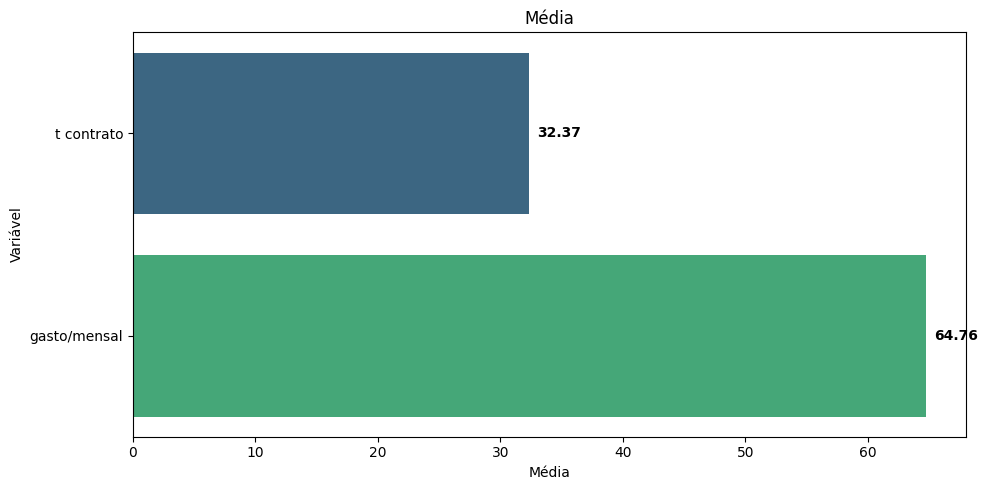

In [125]:
# Criando análise de média com algumas colunas
df_media_cout = ["t contrato", "gasto/mensal"]

media = df[df_media_cout].mean().round(2)

# Criando dataframe com resultados
df_resultado_media = pd.DataFrame({
    "Variável": media.index,
    "Média": media.values,

})


# Plotando gráfico horizontal
plt.figure(figsize=(10, 5))
sns.barplot(data=df_resultado_media, x="Média", y="Variável", palette="viridis")

# Adiciona os valores no final das barras
for index, row in df_resultado_media.iterrows():
    plt.text(row["Média"] + max(df_resultado_media["Média"])*0.01, index, f'{row["Média"]:.2f}',
             va='center', fontsize=10, fontweight='bold')

plt.title("Média")
plt.xlabel("Média")
plt.ylabel("Variável")
plt.tight_layout()
plt.show()

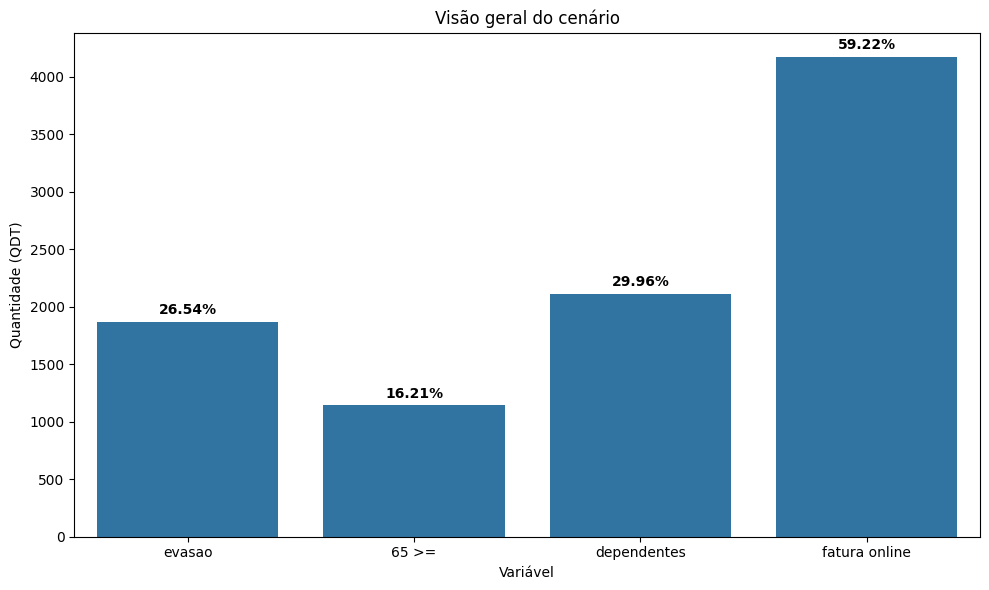

In [126]:
df_contagem_percentual = ["evasao", "65 >=", "dependentes", "fatura online"]

contagem = df[df_contagem_percentual].sum()
percental = df[df_contagem_percentual].mean()*100

df_resultado_percetual = pd.DataFrame({
    "Variável": contagem.index,
    "QDT": contagem.astype(int),
    "Percentual": percental.round(2)
})


# Plot
plt.figure(figsize=(10, 6))
sns.barplot(data=df_resultado_percetual, x="Variável", y="QDT", color="#1f77b4")

# Adiciona rótulos com o percentual em cima de cada barra
for i, row in df_resultado_percetual.iterrows():
    plt.text(i, row["QDT"] + max(df_resultado_percetual["QDT"])*0.01, f'{row["Percentual"]:.2f}%',
             ha='center', va='bottom', fontsize=10, fontweight='bold')

plt.title("Visão geral do cenário")
plt.ylabel("Quantidade (QDT)")
plt.xlabel("Variável")
plt.tight_layout()
plt.show()

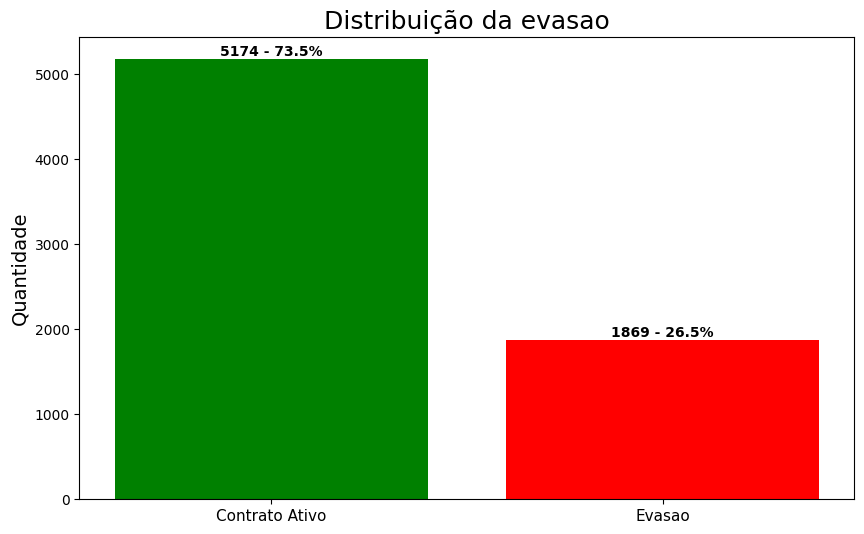

In [127]:
fig, ax = plt.subplots(figsize=(10, 6))
cor = ['#008000', '#FF0000']

ax.bar(df['evasao'].value_counts().index, df['evasao'].value_counts().values, color=cor)
ax.set_xticks([0, 1])
ax.set_xticklabels(['Contrato Ativo', 'Evasao'], fontsize=11)
ax.set_xlabel('', fontsize=14)
ax.set_ylabel('Quantidade', fontsize=14)
ax.set_title('Distribuição da evasao', fontsize=18, color='black')


for i, v in enumerate(df['evasao'].value_counts().values):
      ax.text(i, v, str(v) + f' - {100*v/len(df):.1f}%', ha='center', va='bottom', fontweight='bold')
plt.show()

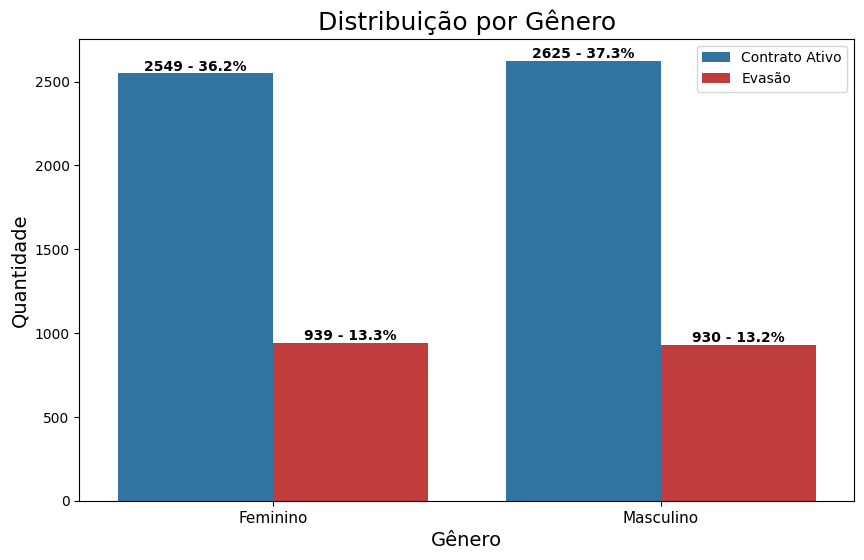

In [128]:
fig, ax = plt.subplots(figsize=(10, 6))
# Define a color palette
palette = {0: "#1f77b4", 1: "#d62728"}
ax = sns.countplot(data=df, x="gênero", hue="evasao", palette=palette)
ax.set_xticks([0, 1])
ax.set_xticklabels(["Feminino", "Masculino"], fontsize=11)
ax.set_xlabel("Gênero", fontsize=14)
ax.set_ylabel("Quantidade", fontsize=14)
ax.set_title("Distribuição por Gênero", fontsize=18, color="black")
ax.legend(labels=["Contrato Ativo", "Evasão"])

for patch in ax.patches:
    x = patch.get_x() + patch.get_width() / 2
    y = patch.get_height()
    if y != 0:
        ax.text(x, y, f'{y:.0f} - {100*y/len(df):.1f}%', ha='center', va='bottom', fontweight='bold')

Text(0.5, 1.0, 'Evasão por Tipo de Contrato')

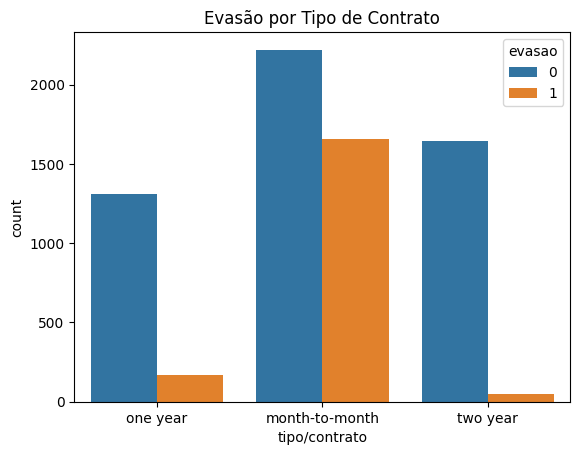

In [129]:
sns.countplot(data=df, x='tipo/contrato', hue='evasao')
plt.title('Evasão por Tipo de Contrato')

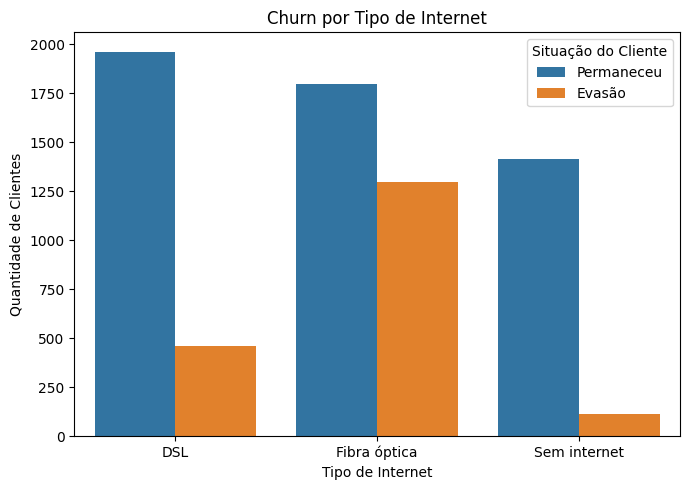

In [133]:
df_plot = df.copy()

# Mapeia os valores da coluna 'internet' para nomes mais descritivos
df_plot['internet'] = df_plot['internet'].replace({
    'dsl': 'DSL',
    'fiber optic': 'Fibra óptica',
    '0': 'Sem internet',
    0: 'Sem internet'
})

df_plot['evasao'] = df_plot['evasao'].map({0: 'Permaneceu', 1: 'Evasão'})


# Cria o gráfico
plt.figure(figsize=(7, 5))
sns.countplot(data=df_plot, x='internet', hue='evasao')
plt.title('Churn por Tipo de Internet')
plt.xlabel('Tipo de Internet')
plt.ylabel('Quantidade de Clientes')
plt.legend(title='Situação do Cliente')
plt.xticks()
plt.tight_layout()
plt.show()

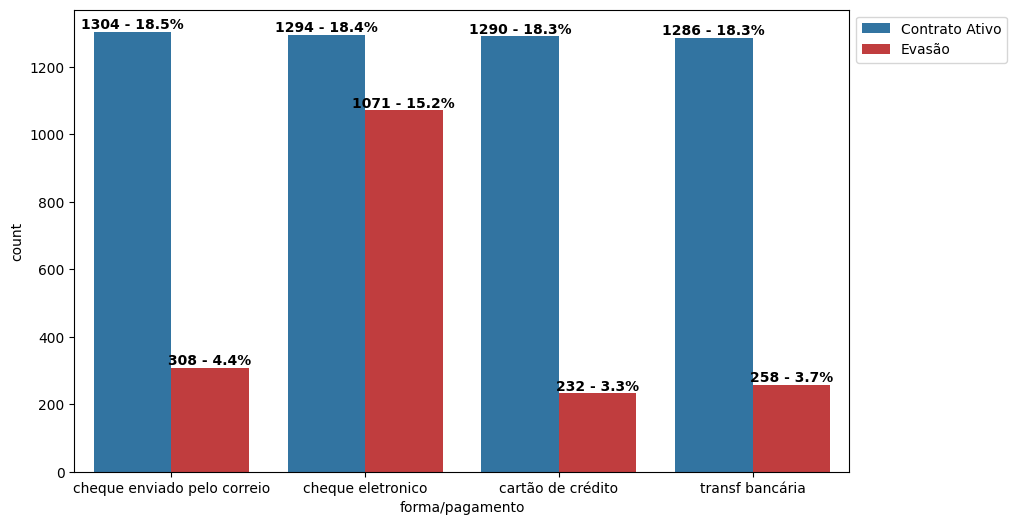

In [131]:
df["forma/pagamento"] = df["forma/pagamento"].replace({
    "mailed check": "cheque enviado pelo correio",
    "electronic check": "cheque eletronico",
    "credit card (automatic)": "cartão de crédito",
    "bank transfer (automatic)": "transf bancária"
})


fig, ax = plt.subplots(figsize=(10, 6))

palette = {0: "#1f77b4", 1: "#d62728"}



# Plotagem
ax = sns.countplot(data=df, x="forma/pagamento", hue="evasao", palette=palette)

# Legenda
ax.legend(labels=["Contrato Ativo", "Evasão"], loc='upper left', bbox_to_anchor=(1, 1))

# Adição de rótulos nas barras
for patch in ax.patches:
    x = patch.get_x() + patch.get_width() / 2
    y = patch.get_height()
    if y != 0:
        ax.text(x, y, f'{y:.0f} - {100*y/len(df):.1f}%', ha='center', va='bottom', fontweight='bold')

# Contagem de Evasão por Variáveis Categóricas

In [134]:
# Cria cópia do DataFrame
df_plot = df.copy()

# Renomeia os valores da coluna evasao
df_plot["evasao"] = df_plot["evasao"].map({0: "Permanência", 1: "Evasão"})

# Gera o gráfico com nova legenda
fig = px.histogram(
    df_plot,
    x="t contrato",
    color="evasao",
    text_auto=True,
    barmode="group",
    color_discrete_map={
        "Permanência": "#1f77b4",  # azul
        "Evasão": "#d62728"       # vermelho
    }
)

fig.update_layout(
    title="Distribuição do Tempo de Contrato por Evasão",
    xaxis_title="Tempo de Contrato (meses)",
    yaxis_title="Quantidade de Clientes",
    legend_title="Situação do Cliente",
    bargap=0.15,
    template="simple_white"
)

fig.show()